In [1]:
import pandas as pd
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
churn = pd.read_csv('data/churn.csv')
churn = churn.drop('RowNumber', axis=1)
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 9.1. Соотношение ушедших и лояльных клиентов

In [39]:
churn1=churn['Exited'].value_counts()
fig1 = px.pie(churn1, values='count', names=['лояльные', 'ушедшие'], title='Соотношение ушедших и лояльных клиентов')
fig1.show()

Лояльных клиентов у Банка в 4 раза больше, чем ушедших.

### 9.2. Распределение баланса пользователей, у которых на счету больше 2 500 долларов.

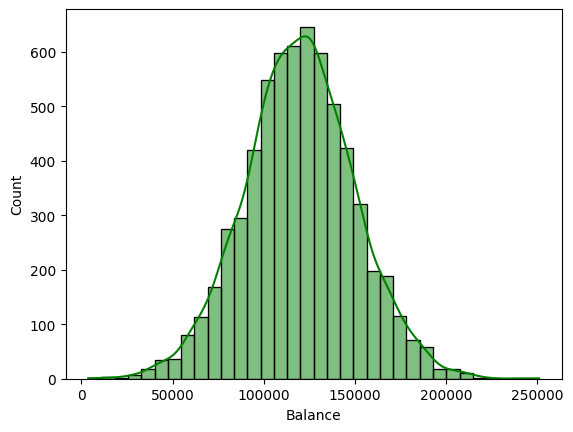

In [63]:
churn2 = churn[churn['Balance']>2500]
sns.histplot(
    data=churn2,
    x='Balance',
    bins=34,
    kde=True,
    color='green'
);

У большей части клиентов на счету хранятся суммы от 100 до 150 тыс.д., при чём середина этого интервала заметно выражена по сравнению с соседними значениями.


### 9.3. Распределение баланса клиента в разрезе признака оттока

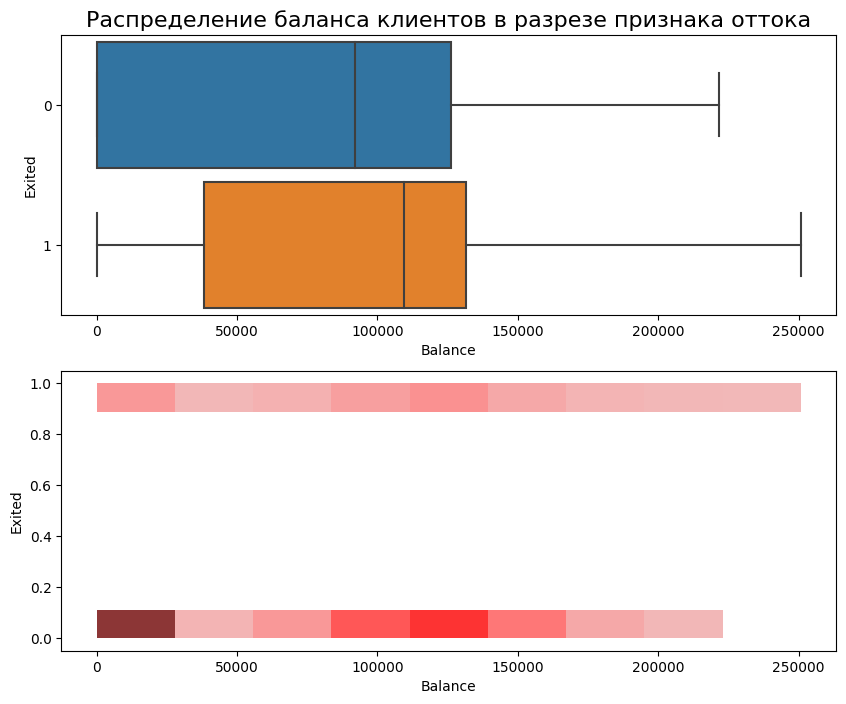

In [19]:
churn3 = churn.iloc[:,[7,12]]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.boxplot(
    data=churn3,
    x='Balance',
    y='Exited',
    orient='h',
    width=0.9,
    ax=axes[0]
);
axes[0].set_title('Распределение баланса клиентов в разрезе признака оттока', fontsize=16)
sns.histplot(
    data=churn3,
    y='Exited',
    x='Balance',
    bins=9,
    color='red',
    ax=axes[1]
);

По обоим графикам можно сделать заключение, что среди лояльных клиентов распределение балансов на счетах тяготеет к 2м диапазонам: от 0 до 25к и от 100к до 150к. Возможно, в банке предусмотрены комфортные условия и бонусы для соответствующих групп клиентов. 

У ушедших с другой стороны более равномерное распределение балансов, а также диапазон включает в себя представителей с более высокими суммами на счету. 

Можно предположить, что существующие клиентские программы успешно удерживают в числе клиентов банка большинство представителей из указаных выше 2х целевых групп. А ушедшие клиенты - это более-менее стабильный фон людей, кого существующие программы лояльности не заинтересовали.

### 9.4. Распределение возраста в разрезе признака оттока

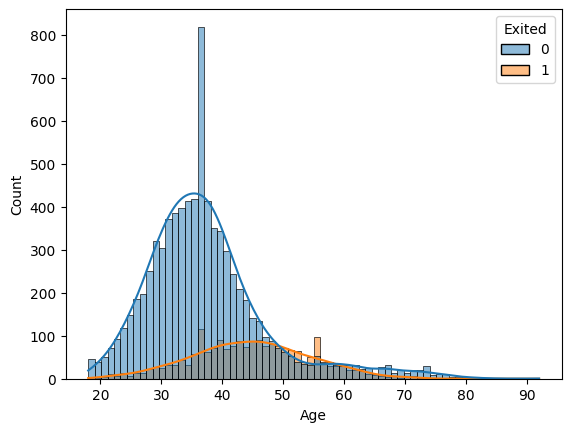

In [55]:
sns.histplot(
    data=churn,
    x='Age',
    hue='Exited',
    bins=70,
    kde=True
);

Количество клиентов банка, у которых возраст на момент сбора статистики 37-38 лет, значительно выбивается из ожидаемого распределения. При этом как среди ушедших, так и среди лояльных клиентов.

Если отбросить предположение в духе того, что 37 лет назад именно в год их рождения банк предоставлял феноменально выгодные условия оформления счёта для родившихся в этом году, то следует предположить наличие потенциальных выбросов в этом диапазоне возрастов.

Наибольшая категория лояльных клиентов являются представителями возраста 30-40 лет, а количество лояльных превышает ушедших в диапазоне возрастов от 0 до 50. 

В диапазоне от 50 до 60 лет по графику видно, что отток клиентов начинает превышать лояльных. Банку следует обратить внимание на эту категорию.

### 9.5. Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты c расцветкой по признаку оттока клиентов

In [5]:
churn5 = churn.iloc[:,[2,11,12]].copy()
# пытаюсь найти какую-нибудь разницу у распределений по exited 0 и 1
churn5['scoreRate'] = (churn5['CreditScore'])/churn5['EstimatedSalary']
churn5['scoreRate2']= np.emath.logn(churn5['CreditScore'],churn5['EstimatedSalary'])
churn5['scoreRate3'] = churn5['CreditScore']**2
churn5


,CreditScore,EstimatedSalary,Exited,scoreRate,scoreRate2,scoreRate3
0,619,101348.88,1,0.006108,1.793114,383161
1,608,112542.58,0,0.005402,1.814473,369664
2,502,113931.57,1,0.004406,1.872343,252004
3,699,93826.63,0,0.007450,1.748063,488601
4,850,79084.10,0,0.010748,1.672034,722500
...,...,...,...,...,...,...
9995,771,96270.64,0,0.008009,1.726152,594441
9996,516,101699.77,0,0.005074,1.845915,266256
9997,709,42085.58,1,0.016847,1.622135,502681
9998,772,92888.52,1,0.008311,1.720436,595984


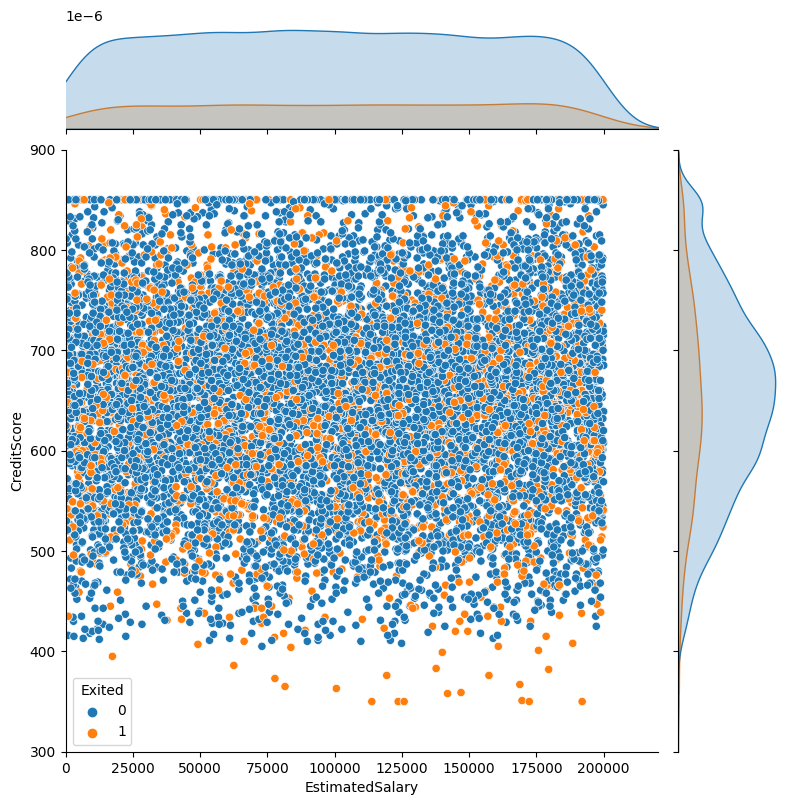

In [6]:
sns.jointplot(
    data=churn5, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited',
    xlim = (0, 220000),
    ylim = (300, 900),
    height=8,
);

Каких-то общих закономерностей для всего диапазона значений мною не выявлено.

По графику видно, что среди ушедших клиентов есть примеры с кредитным рейтингом более низким, чем у лояльных - менее 400. При чём такой заниженный рейтинг встречается на различных уровнях предполагаемых зарплат. Однако, общее распределение кредитных рейтингов хоть и принимает по некоторым клиентам более низкие значения, в общей массе повторяет тренд кредитных рейтингов лояльных клиентов.

### 9.6. Частота ухода мужчины и женщины

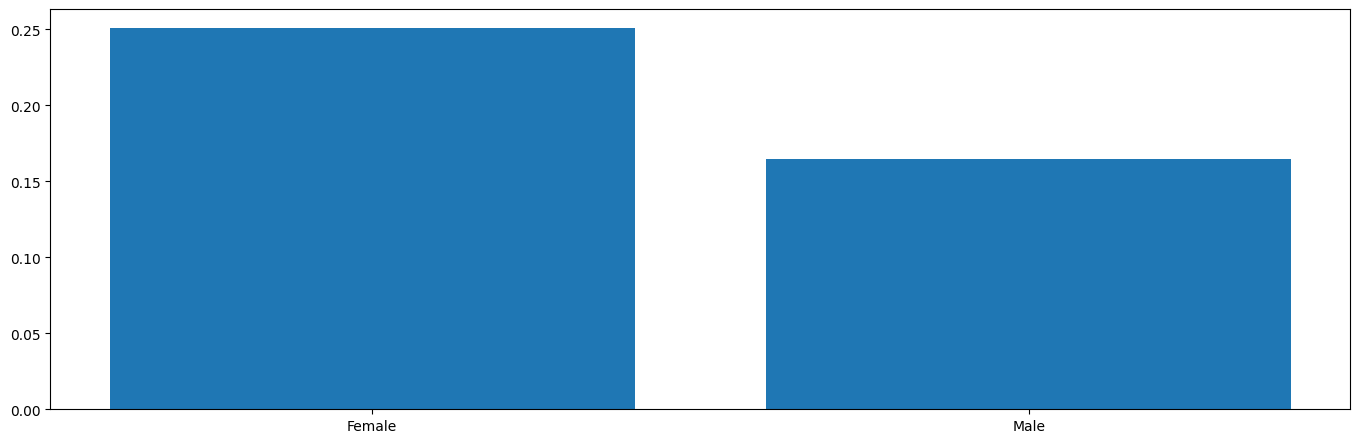

In [48]:
# расчёт отношения ушедших к лояльным в разрезе пола
churn6= churn.groupby('Gender')['Exited'].sum()/churn.groupby('Gender')['Gender'].value_counts()

fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(
    x = churn6.index,
    height = churn6,
    );

Таким образом доля ушедших клиентов женского пола по отношению ко всем клиентам женского пола выше, чем доля ушедших клиентов мужского пола.

### 9.7. Зависимость оттока клиентов от числа приобретённых у банка услуг

In [42]:
churn7 = churn.groupby(['NumOfProducts','Exited'])['Exited'].agg('count').unstack()

fig = px.bar(churn7, x=churn7.index, y=[0,1], title='Количество пеобретённых продуктов')
fig.show()

Число лояльных клиентов подключивших 2 услуги по отношению ушедшим с 2 услугами значительно выше, чем аналогичное соотношение по другим количествам услуг.

Можно сделать вывод, что клиенты, которым интересны 2 услуги банка наиболее лояльны и уходят реже.

### 9.8. Влияние наличие статуса активного клиента на отток клиентов

In [107]:
churn8 = churn.groupby(['IsActiveMember','Exited'])['Exited'].agg('count')

fig = px.pie(churn8, values=churn8, names=['лояльные неактивные', 'ушедшие неактивные','лояльные активные' ,'ушедшие активные'])
fig.show()

С помощью диаграмы вида "пирог" представлено общее число клиентов в разбивке по соотношению между заданными группами.

По диаграмме видно, что соотношение между всеми активными и всеми неактивными очень близко к половине. Однако среди активных клиентов уходит меньший процент.

Банку можно рекомендовать работать над повышением активности клиентов, что должно автоматически повлечь за собой уменьшение их оттока.

### 9.9. Доля ушедших клиентов по странам

In [128]:
churn9 = churn.groupby(['Geography','Exited'])['Exited'].agg('count').unstack()
churn9['rate'] = churn9[1]/(churn9[0]+churn9[1])

fig = px.choropleth(
    data_frame=churn9, 
    locations=churn9.index, 
    locationmode = "country names", 
    color='rate', 
    #animation_frame="date", #анимационный ползунок
    range_color=[0, 0.5],
    title='Доля ушедших клиентов по странам', 
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем его
fig.show()

В Германии наименьшее число лояльных клиентов, что даёт наибольшую долю ушедших в сравнении с остальными странами. Это может быть связано как с непополярностью услуг данного банка в этой стране в целом, так и с неподходящими предложениями конкретно для этой страны.

### 9.10. Категории клиентов, которые уходят чаще всего, в разбивке по годам

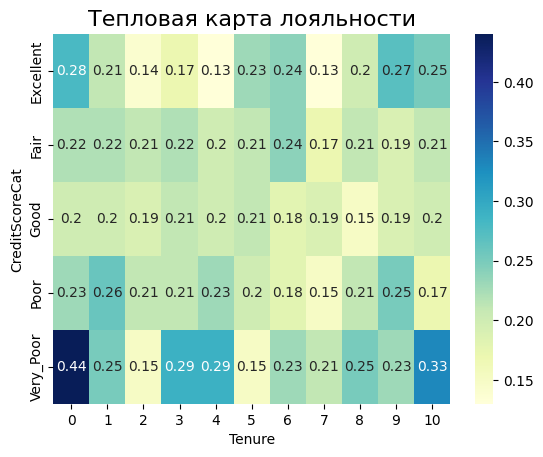

In [14]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
    

churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat)
churn10 = churn.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',    
    fill_value=0
).round(2)

heatmap = sns.heatmap(data=churn10, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта лояльности', fontsize=16);

Чаще всего уходят клиенты с низким кредитным рейтингом (<300) в первый же год.
На втором месте опять же клиенты с низким кредитным рейтингом на 10й год пользования услугами.
На 3м месте клиенты с низким рейтингом в 3й и 4й год использования услуг. Близка к ним доля клиентов с превосходным рейтингом, ушедшие в первый год.

В целом чаще других уходят клиенты с низким кредитным рейтингом.